# Timeseries

# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

Objective:

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 

Dataset:

The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

Part 1: Data Preparation and Exploration

1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
                                             
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
                                             
Part 2: Model Building - ARIMA
                                             
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
                                             
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
                                             
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
                                             
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
                                             
Part 3: Model Building - Exponential Smoothing
                                             
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
    
Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Deliverables:

•	Include visualizations and explanations for the choices and findings at each step.
    
•	Well-commented Python code that used to conduct the analysis and build the models.
    
Assessment Criteria:

•	Accuracy and completeness of the data preparation and exploration steps.
    
•	Justification for model selection and parameter tuning decisions.
    
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
    
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.



# Part 1: Data Preparation and Exploration

In [1]:
import pandas as pd
rates=pd.read_csv("C:\DS assignments\exchange_rate.csv")
rates

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
import pandas as pd
rates=pd.read_csv("C:\DS assignments\exchange_rate.csv")
rates['Month'] = pd.to_datetime(rates['date'], format='%d-%m-%Y %H:%M').dt.month # Specify the correct format for the date column
rates

,date,Ex_rate,Month
0,01-01-1990 00:00,0.785500,1
1,02-01-1990 00:00,0.781800,1
2,03-01-1990 00:00,0.786700,1
3,04-01-1990 00:00,0.786000,1
4,05-01-1990 00:00,0.784900,1
...,...,...,...
7583,06-10-2010 00:00,0.718494,10
7584,07-10-2010 00:00,0.721839,10
7585,08-10-2010 00:00,0.723197,10
7586,09-10-2010 00:00,0.720825,10


In [3]:
rates['Year'] = pd.to_datetime(rates['date'], format='%d-%m-%Y %H:%M').dt.year
rates


,date,Ex_rate,Month,Year
0,01-01-1990 00:00,0.785500,1,1990
1,02-01-1990 00:00,0.781800,1,1990
2,03-01-1990 00:00,0.786700,1,1990
3,04-01-1990 00:00,0.786000,1,1990
4,05-01-1990 00:00,0.784900,1,1990
...,...,...,...,...
7583,06-10-2010 00:00,0.718494,10,2010
7584,07-10-2010 00:00,0.721839,10,2010
7585,08-10-2010 00:00,0.723197,10,2010
7586,09-10-2010 00:00,0.720825,10,2010


In [37]:
rates["Ex_rate"].describe()

count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64

# heatmap

<Axes: xlabel='Month', ylabel='Year'>

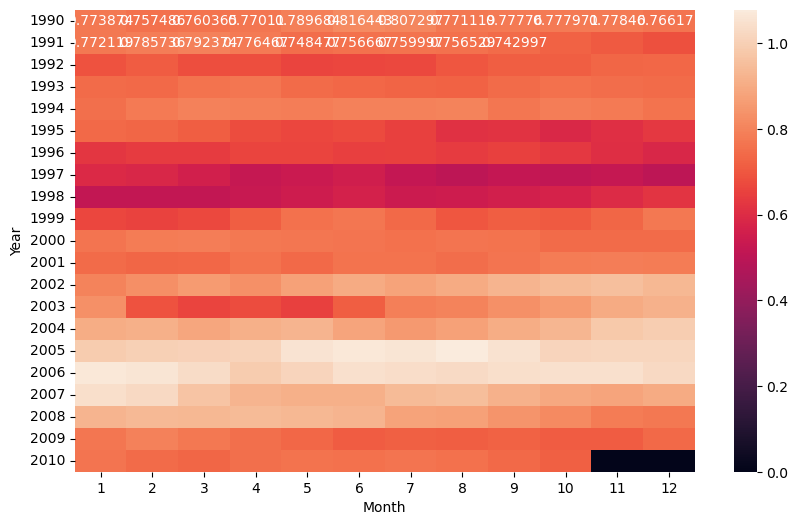

In [4]:
heatmap_y_month = pd.pivot_table(data=rates,values="Ex_rate",index="Year",columns="Month",fill_value=0)
heatmap_y_month
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

# Boxplot for month wise

<Axes: xlabel='Month', ylabel='Ex_rate'>

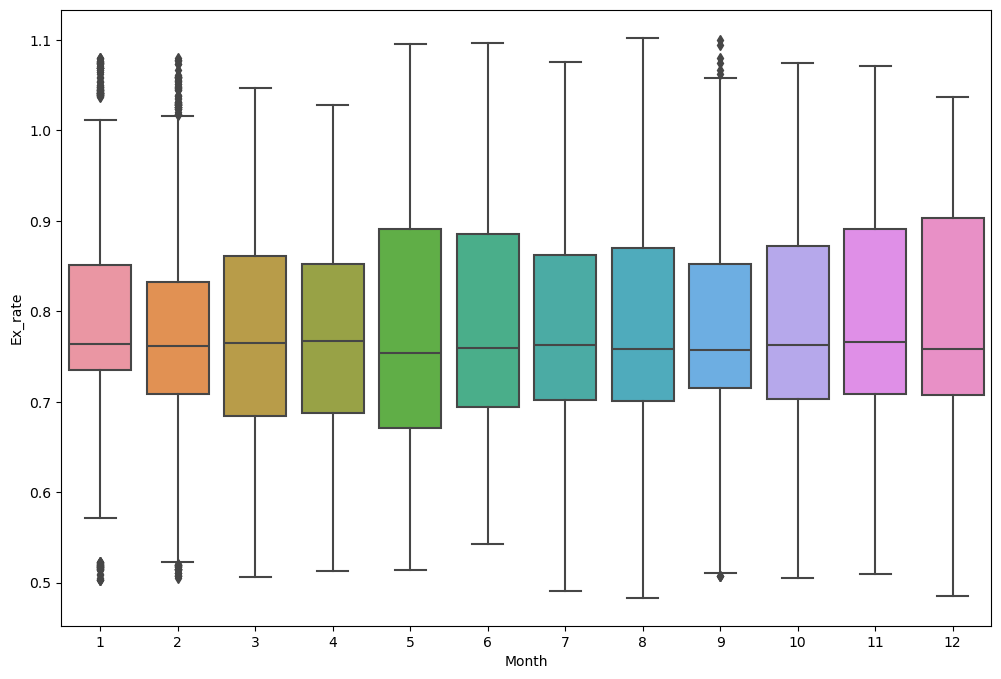

In [5]:
# Boxplot for every month
plt.figure(figsize=(12,8))
sns.boxplot(x="Month",y="Ex_rate",data=rates)


# -insights

- in month of jan ,feb and sep outliers are present
- that means in that months rates going high or low
- in month of may rates are low
-in month of nov rates are high 

# boxplot for year wise

<Axes: xlabel='Year', ylabel='Ex_rate'>

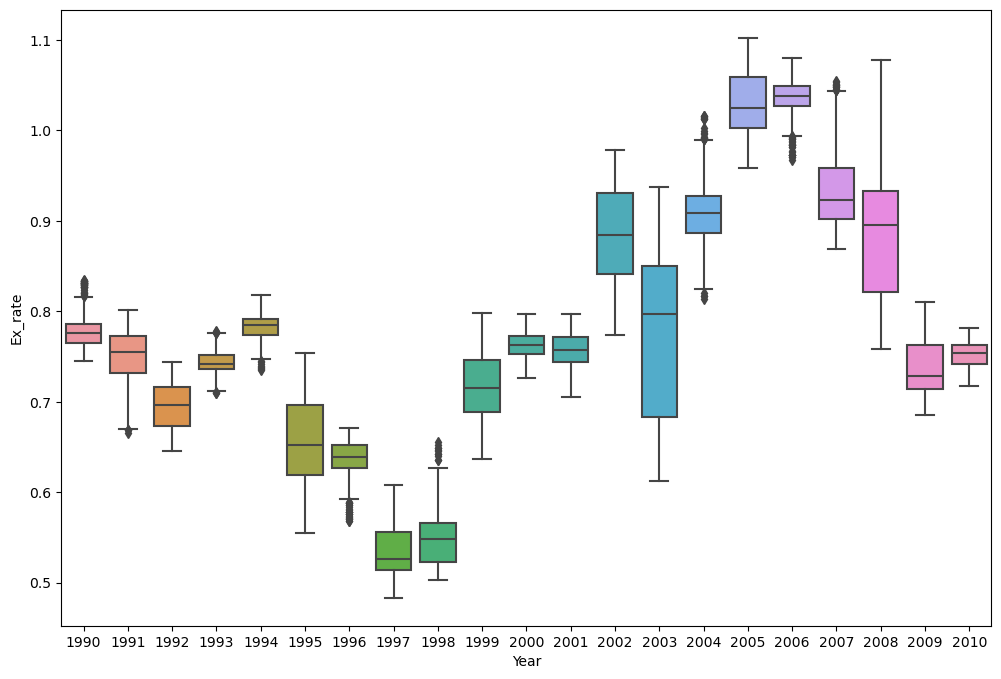

In [6]:
# Boxplot for every year
plt.figure(figsize=(12,8))
sns.boxplot(x="Year",y="Ex_rate",data=rates)


# -insights

- year 1990,1991,93,94,96,98,2004,2006,2007 have outliers
- in the year of 2006 rates are very high
- in the year of 1997 rates are very low

# Line plot

C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhinay\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Ex_rate'>

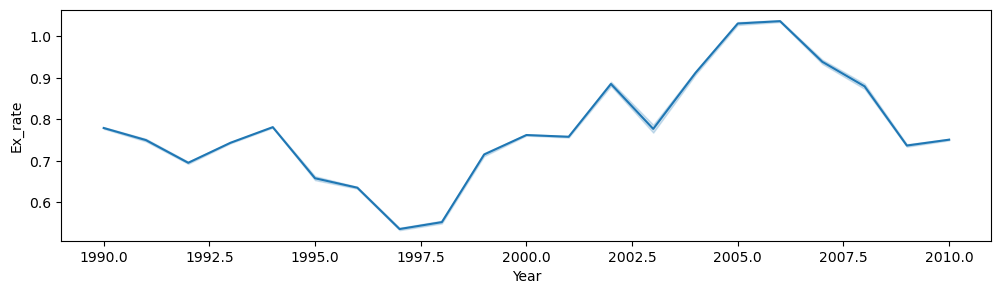

In [7]:
# line plot for every year
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Ex_rate",data=rates)


# ACF

<Figure size 1200x600 with 0 Axes>

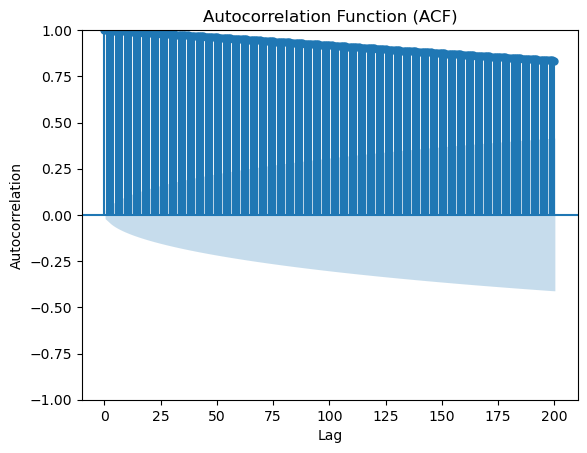

In [8]:
#make a autocorrelation(ACF) plot

from statsmodels.graphics.tsaplots import plot_acf
# Assuming 'Ex_rate' is the time series data you want to analyze
plt.figure(figsize=(12, 6))
plot_acf(rates['Ex_rate'], lags=200)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Part 2: Model Building - ARIMA

In [9]:
import numpy as np
import pandas as pd
Month_Dummies = pd.DataFrame(pd.get_dummies(rates['Month']))
rates1= pd.concat([rates,Month_Dummies],axis = 1)
rates1["t"] = np.arange(1,7589)
rates1["t_squared"] = rates1["t"]*rates1["t"]
rates1["Log_Ex_rate"] = np.log(rates1["Ex_rate"])
rates1

,date,Ex_rate,Month,Year,1,2,3,4,5,6,7,8,9,10,11,12,t,t_squared,Log_Ex_rate
0,01-01-1990 00:00,0.785500,1,1990,True,False,False,False,False,False,False,False,False,False,False,False,1,1,-0.241435
1,02-01-1990 00:00,0.781800,1,1990,True,False,False,False,False,False,False,False,False,False,False,False,2,4,-0.246156
2,03-01-1990 00:00,0.786700,1,1990,True,False,False,False,False,False,False,False,False,False,False,False,3,9,-0.239908
3,04-01-1990 00:00,0.786000,1,1990,True,False,False,False,False,False,False,False,False,False,False,False,4,16,-0.240798
4,05-01-1990 00:00,0.784900,1,1990,True,False,False,False,False,False,False,False,False,False,False,False,5,25,-0.242199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,10,2010,False,False,False,False,False,False,False,False,False,True,False,False,7584,57517056,-0.330598
7584,07-10-2010 00:00,0.721839,10,2010,False,False,False,False,False,False,False,False,False,True,False,False,7585,57532225,-0.325953
7585,08-10-2010 00:00,0.723197,10,2010,False,False,False,False,False,False,False,False,False,True,False,False,7586,57547396,-0.324074
7586,09-10-2010 00:00,0.720825,10,2010,False,False,False,False,False,False,False,False,False,True,False,False,7587,57562569,-0.327359


# moving average

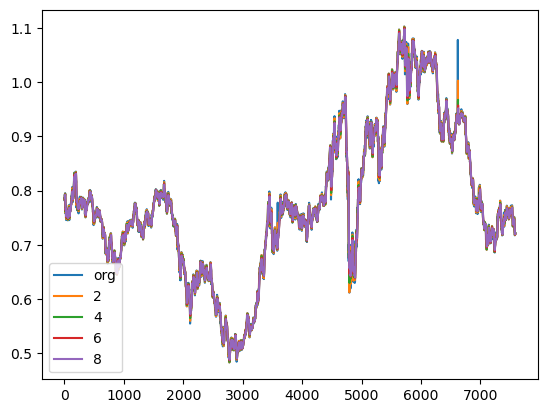

In [10]:
# moving average
rates.Ex_rate.plot(label="org")
for i in range(2,10,2):
    rates["Ex_rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: >

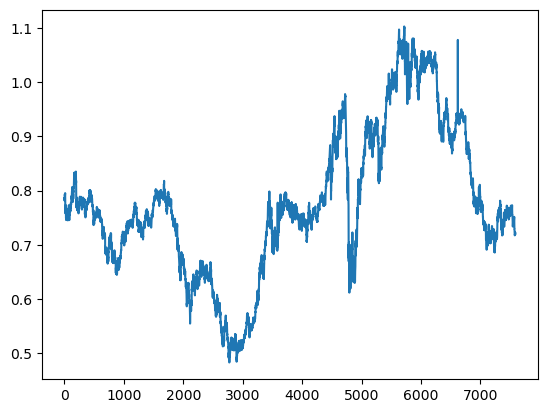

In [11]:
rates.Ex_rate.plot()

# Part 3: Model Building - Exponential Smoothing

In [12]:
# Splitting data

Train = rates1.head(7000)
Test = rates1.tail(588)


In [13]:
import statsmodels.formula.api as smf
import numpy as np


# Build Model & RMSE Value

# Linear model

In [14]:
# linear model
linear_model = smf.ols('Ex_rate~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_linear))**2))
rmse_linear

0.2027525387121618

# Exponential model

In [15]:
#Exponential
Exp = smf.ols('Log_Ex_rate~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


0.19565877547541646

# quadratic model

In [16]:
# Quadratic
Quad = smf.ols('Ex_rate~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_Quad))**2))
rmse_Quad


0.3668921351679299

# additive sesonality model

In [17]:
# additive seasonlity
add_sea = smf.ols('Ex_rate ~ C(Month)', data=Train).fit()  # Assuming you have a 'Month' column
pred_add_sea = pd.Series(add_sea.predict(Test[['Month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ex_rate']) - np.array(pred_add_sea)) ** 2))
rmse_add_sea

0.04679424078163514

# Additive Seasonality Quadratic model

In [18]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Ex_rate ~ t+t_squared+C(Month)', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t', 't_squared', 'Month']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Ex_rate']) - np.array(pred_add_sea_quad)) ** 2))
rmse_add_sea_quad


0.3675071724970842

# Multiplicative Seasonality model

In [19]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Ex_rate~C(Month)',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


0.036096436164084686

# Multiplicative Additive Seasonality model

In [ ]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Ex_rate~t+C(Month)',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea


# Part 4: Evaluation and Comparison

# TESTING

In [21]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
type(data)
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
5,rmse_Mult_sea,0.036096
3,rmse_add_sea,0.046794
1,rmse_Exp,0.195659
6,rmse_Mult_add_sea,0.195685
0,rmse_linear,0.202753
2,rmse_Quad,0.366892
4,rmse_add_sea_quad,0.367507


# PREDICT WITH NEW DATA

In [22]:
t = np.arange(7889,7911)
t

array([7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899,
       7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910])

In [23]:
t_squared=np.array(t*t)
t_squared

array([62236321, 62252100, 62267881, 62283664, 62299449, 62315236,
       62331025, 62346816, 62362609, 62378404, 62394201, 62410000,
       62425801, 62441604, 62457409, 62473216, 62489025, 62504836,
       62520649, 62536464, 62552281, 62568100])

In [24]:
date = pd.DataFrame({'date':['11-10-2010','12-10-2010','13-10-2010','14-10-2010','15-10-2010','16-10-2010','17-10-2010',
                               '18-10-2010','19-10-2010','20-10-2010','20-10-2010','21-10-2010','22-10-2010',
                               '23-10-2010','24-10-2010','25-10-2010','26-10-2010','27-10-2010','28-10-2010','29-10-2010','30-10-2010','31-10-2010']})
date

,date
0,11-10-2010
1,12-10-2010
2,13-10-2010
3,14-10-2010
4,15-10-2010
5,16-10-2010
6,17-10-2010
7,18-10-2010
8,19-10-2010
9,20-10-2010


In [25]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)
df

,t,t_squared
0,7889,62236321
1,7890,62252100
2,7891,62267881
3,7892,62283664
4,7893,62299449
5,7894,62315236
6,7895,62331025
7,7896,62346816
8,7897,62362609
9,7898,62378404


In [26]:
newdata = pd.concat([date,df],axis=1)
newdata

,date,t,t_squared
0,11-10-2010,7889,62236321
1,12-10-2010,7890,62252100
2,13-10-2010,7891,62267881
3,14-10-2010,7892,62283664
4,15-10-2010,7893,62299449
5,16-10-2010,7894,62315236
6,17-10-2010,7895,62331025
7,18-10-2010,7896,62346816
8,19-10-2010,7897,62362609
9,20-10-2010,7898,62378404


# Build the model on entire dataset

In [33]:
model_full = smf.ols('Ex_rate~t',data=rates1).fit()


In [34]:
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     0.903429
1     0.903460
2     0.903491
3     0.903522
4     0.903553
5     0.903584
6     0.903614
7     0.903645
8     0.903676
9     0.903707
10    0.903738
11    0.903769
12    0.903800
13    0.903831
14    0.903862
15    0.903892
16    0.903923
17    0.903954
18    0.903985
19    0.904016
20    0.904047
21    0.904078
dtype: float64

In [35]:
newdata["forecasted_passengers"]=pd.Series(pred_new)
newdata

,date,t,t_squared,forecasted_passengers
0,11-10-2010,7889,62236321,0.903429
1,12-10-2010,7890,62252100,0.903460
2,13-10-2010,7891,62267881,0.903491
3,14-10-2010,7892,62283664,0.903522
4,15-10-2010,7893,62299449,0.903553
5,16-10-2010,7894,62315236,0.903584
6,17-10-2010,7895,62331025,0.903614
7,18-10-2010,7896,62346816,0.903645
8,19-10-2010,7897,62362609,0.903676
9,20-10-2010,7898,62378404,0.903707


# observation

Multiplicative Seasonality gives the best prediction of least RMSE of 0.036.